# EDA SPEEDS DATASET 

This dataset consists of speeds captured with the Bitcarrier sensor system (real-time intelligent traffic flow information and monitoring system) from wireless WI-FI and Bluetooth sensors, emitted by mobile devices on the road network of Bogota D.C. for the month of January 2022. It is in CSV format and was extracted from the Open Data from the [Secretaría Distrital de Movilidad](https://datos.movilidadbogota.gov.co/datasets/movilidadbogota::velocidades-bitcarrier-enero2022-24h/explore?location=4.630679%2C-74.063436%2C15.98). Speeds correspond to quarter-hourly averages during 24 hours. The dataset has 2'660.955 observations and 23 columns. Some important features are the following:

**OBJECT_ID**: Identifier of the measurement.

**TID**: Identifier of the section of road where the speed is monitored. 

**INICIO, FIN**: Start and end date and hour of the measurement.

**DISTANCE**: Length of the section of road.

**VEL_PROMEDIO**: Average speed in the section of road.

**NAME_FROM**: Name of the first address of the section of road.

**NAME_TO**: Tuple consisting of the secondary start and end address of the section of road. 

Besides these, there's other features highlighting temporal aspects of the measurement like for example: (AÑO, HORA, CUARTO_HORA, DIA_SEMANA, MES). There's also a few features relating to the speed: (CODIGO, COEF_BRT, COEF_MIXTO, VEL_MEDIA_PONDERADA, VEL_MEDIA_BRT, VEL_MEDIA_MIXTO).

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
speeds = pd.read_csv("../0 - datasets/Velocidades_Bitcarrier_Enero2022_24H_SUBSET.csv", parse_dates=["INICIO", "FIN"])
pd.options.display.max_columns = None

Let's look at the first columns:

In [7]:
speeds.head()

,Unnamed: 0,OBJECTID,TID,INICIO,FIN,AÑO,HORA,DISTANCE,TYPE,VEL_PROMEDIO,CUARTO_HORA,DIA_SEMANA,MES,NAME_FROM,NAME_TO,VEL_PONDERADA,CODIGO,COEF_BRT,COEF_MIXTO,VEL_MEDIA_BRT,VEL_MEDIA_MIXTO,VEL_MEDIA_PONDERADA,NUMDISPOSITIVOS,SHAPE_Length
0,0,1,1002075,2022-01-01 00:00:00+00:00,2022-01-01 00:14:59+00:00,2022,0,696.0,1.0,54.666667,12:00:00,Sabado,January,CL80,KR71;KR76,54.666667,NaN,NaN,NaN,NaN,NaN,NaN,3,0.006276
1,1,2,1002065,2022-01-01 00:00:00+00:00,2022-01-01 00:14:59+00:00,2022,0,684.0,1.0,34.620000,12:00:00,Sabado,January,KR19,CL140;CL147,34.620000,NaN,NaN,NaN,NaN,NaN,NaN,3,0.006185
2,2,3,1002042,2022-01-01 00:00:00+00:00,2022-01-01 00:14:59+00:00,2022,0,995.0,1.0,77.403333,12:00:00,Sabado,January,CL26,AV.ROJAS;NORMANDIA,75.920000,NaN,NaN,NaN,NaN,NaN,NaN,4,0.008991
3,3,4,1002078,2022-01-01 00:00:00+00:00,2022-01-01 00:14:59+00:00,2022,0,719.0,1.0,5.250000,12:00:00,Sabado,January,KR60,CL53;CL26,2.625000,NaN,NaN,NaN,NaN,NaN,NaN,2,0.006490
4,4,5,1002088,2022-01-01 00:00:00+00:00,2022-01-01 00:14:59+00:00,2022,0,441.0,1.0,39.696667,12:00:00,Sabado,January,KR86,CL19A;CL22,39.372500,NaN,NaN,NaN,NaN,NaN,NaN,4,0.003987


### Missing values

Let's examine the missing values:

In [8]:
speeds.isnull().any()

Unnamed: 0             False
OBJECTID               False
TID                    False
INICIO                 False
FIN                    False
AÑO                    False
HORA                   False
DISTANCE                True
TYPE                    True
VEL_PROMEDIO           False
CUARTO_HORA            False
DIA_SEMANA             False
MES                    False
NAME_FROM               True
NAME_TO                 True
VEL_PONDERADA          False
CODIGO                  True
COEF_BRT                True
COEF_MIXTO              True
VEL_MEDIA_BRT           True
VEL_MEDIA_MIXTO         True
VEL_MEDIA_PONDERADA     True
NUMDISPOSITIVOS        False
SHAPE_Length           False
dtype: bool

In [9]:
x = speeds.isnull().all() 
x[x == True]

CODIGO                 True
COEF_BRT               True
COEF_MIXTO             True
VEL_MEDIA_BRT          True
VEL_MEDIA_MIXTO        True
VEL_MEDIA_PONDERADA    True
dtype: bool

The DISTANCE, NAME_FROM y NAME_TO features have missing values.On the other hand, the features: CODIGO, COEF_BR, COEF_MIXTO, VEL_MEDIA_BRT, VEL_MEDIA_MIXTO y VEL_MEDIA_PONDERADA don't have values at all, so it's best to ignore them. 

In [10]:
null_cols = ["CODIGO", "COEF_BRT", "COEF_MIXTO", "VEL_MEDIA_PONDERADA", "VEL_MEDIA_BRT", "VEL_MEDIA_MIXTO"]
speeds = speeds[[col for col in speeds.columns if col not in null_cols]]
speeds.head()

,Unnamed: 0,OBJECTID,TID,INICIO,FIN,AÑO,HORA,DISTANCE,TYPE,VEL_PROMEDIO,CUARTO_HORA,DIA_SEMANA,MES,NAME_FROM,NAME_TO,VEL_PONDERADA,NUMDISPOSITIVOS,SHAPE_Length
0,0,1,1002075,2022-01-01 00:00:00+00:00,2022-01-01 00:14:59+00:00,2022,0,696.0,1.0,54.666667,12:00:00,Sabado,January,CL80,KR71;KR76,54.666667,3,0.006276
1,1,2,1002065,2022-01-01 00:00:00+00:00,2022-01-01 00:14:59+00:00,2022,0,684.0,1.0,34.620000,12:00:00,Sabado,January,KR19,CL140;CL147,34.620000,3,0.006185
2,2,3,1002042,2022-01-01 00:00:00+00:00,2022-01-01 00:14:59+00:00,2022,0,995.0,1.0,77.403333,12:00:00,Sabado,January,CL26,AV.ROJAS;NORMANDIA,75.920000,4,0.008991
3,3,4,1002078,2022-01-01 00:00:00+00:00,2022-01-01 00:14:59+00:00,2022,0,719.0,1.0,5.250000,12:00:00,Sabado,January,KR60,CL53;CL26,2.625000,2,0.006490
4,4,5,1002088,2022-01-01 00:00:00+00:00,2022-01-01 00:14:59+00:00,2022,0,441.0,1.0,39.696667,12:00:00,Sabado,January,KR86,CL19A;CL22,39.372500,4,0.003987


The columns where perhaps it is more significant the lack of values is in NAME_TO and NAME_FROM columns.

In [11]:
speeds[(speeds["NAME_TO"].isnull()) | (speeds["NAME_FROM"].isnull())].head()

,Unnamed: 0,OBJECTID,TID,INICIO,FIN,AÑO,HORA,DISTANCE,TYPE,VEL_PROMEDIO,CUARTO_HORA,DIA_SEMANA,MES,NAME_FROM,NAME_TO,VEL_PONDERADA,NUMDISPOSITIVOS,SHAPE_Length
27,27,28,1002311,2022-01-01 00:00:00+00:00,2022-01-01 00:14:59+00:00,2022,0,NaN,NaN,49.076667,12:00:00,Sabado,January,NaN,NaN,49.076667,3,0.0
39,39,40,1002452,2022-01-01 00:00:00+00:00,2022-01-01 00:14:59+00:00,2022,0,NaN,NaN,21.045000,12:00:00,Sabado,January,NaN,NaN,14.030000,3,0.0
40,40,41,1002428,2022-01-01 00:00:00+00:00,2022-01-01 00:14:59+00:00,2022,0,NaN,NaN,15.970000,12:00:00,Sabado,January,NaN,NaN,10.646667,3,0.0
43,43,44,1002392,2022-01-01 00:00:00+00:00,2022-01-01 00:14:59+00:00,2022,0,NaN,NaN,38.855000,12:00:00,Sabado,January,NaN,NaN,25.903333,3,0.0
52,52,53,1002448,2022-01-01 00:00:00+00:00,2022-01-01 00:14:59+00:00,2022,0,NaN,NaN,71.276667,12:00:00,Sabado,January,NaN,NaN,70.852500,4,0.0


Fortunately there's only 7803 rows that have either missing NAME_TO or NAME_FROM features and it does not represent a significant portion of the data.

### Speeds analysis

The VEL_PROMEDIO and VEL_PONDERADA columns seem to equal, lets compute the mean difference between them:

In [12]:
(speeds["VEL_PROMEDIO"] - speeds["VEL_PONDERADA"]).mean()

2.5493224925456808

As the mean difference is just about 1.5 km/h, we may dismiss one of them.

In [13]:
speeds = speeds[[col for col in speeds.columns if col != "VEL_PONDERADA"]]

Summary statistics:

In [14]:
speeds["VEL_PROMEDIO"].describe().to_frame()

,VEL_PROMEDIO
count,250000.000000
mean,33.480127
std,14.834733
min,4.010000
25%,22.766250
50%,31.550000
75%,41.980000
max,185.503333


Speeds distribution:

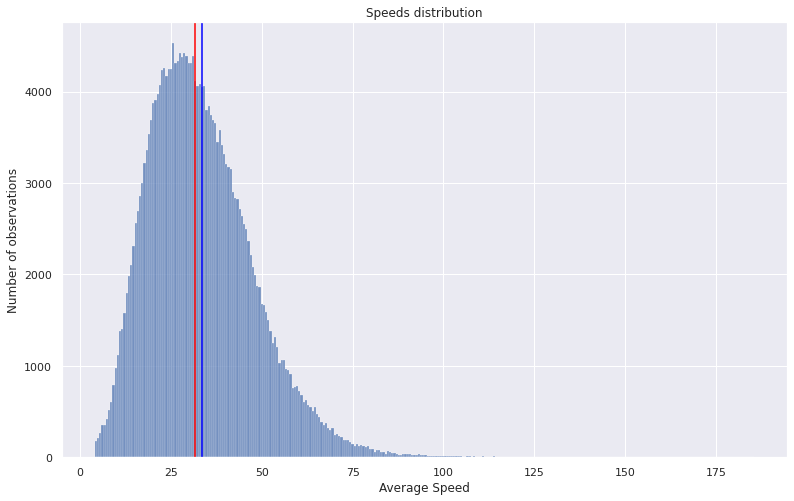

In [15]:
plt.figure(figsize=(13,8))
sns.set(style="darkgrid")
sns.histplot(speeds["VEL_PROMEDIO"])
plt.title("Speeds distribution")
plt.ylabel("Number of observations")
plt.xlabel("Average Speed")
plt.axvline(x=speeds["VEL_PROMEDIO"].mean(),
            color='blue')
plt.axvline(x=speeds["VEL_PROMEDIO"].median(),
            color='red')
plt.show()

### Speeds v.s. Time 

As the all the data corresponds to the month of January of 2022. We may ignore the AÑO and MES columns as they are redundant

In [16]:
speeds = speeds[[col for col in speeds.columns if col not in ["MES", "AÑO"]]]

Now let's visualize the average speed in Bogotá per hour of the day and per day of the week:

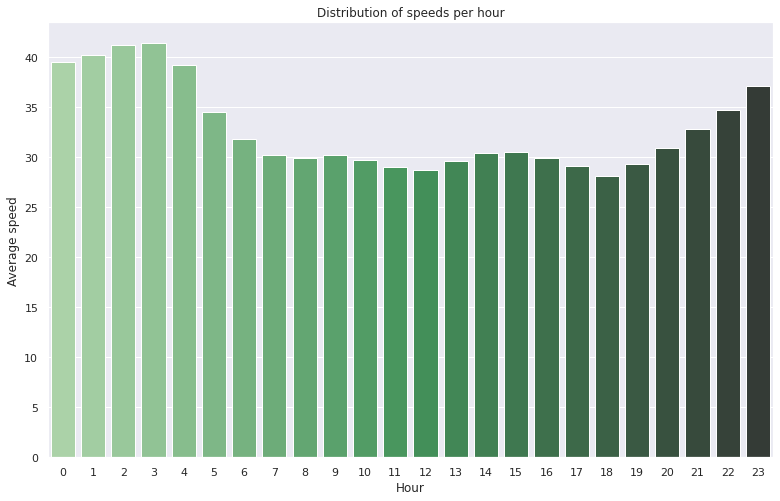

In [17]:
speeds_per_hour = speeds.groupby("HORA")["VEL_PROMEDIO"].mean().to_frame().reset_index()

plt.figure(figsize=(13,8))
sns.barplot(x="HORA", y="VEL_PROMEDIO", data=speeds_per_hour, palette="Greens_d") 
plt.title('Distribution of speeds per hour')
plt.xlabel('Hour')
plt.ylabel('Average speed')
plt.show()

As expected people go faster late at night, perhaps because there's less traffic and people in general at those times. Meanwhile from 6 a.m to 5 p.m, the speeds decrease plateauning around 25 km/h.

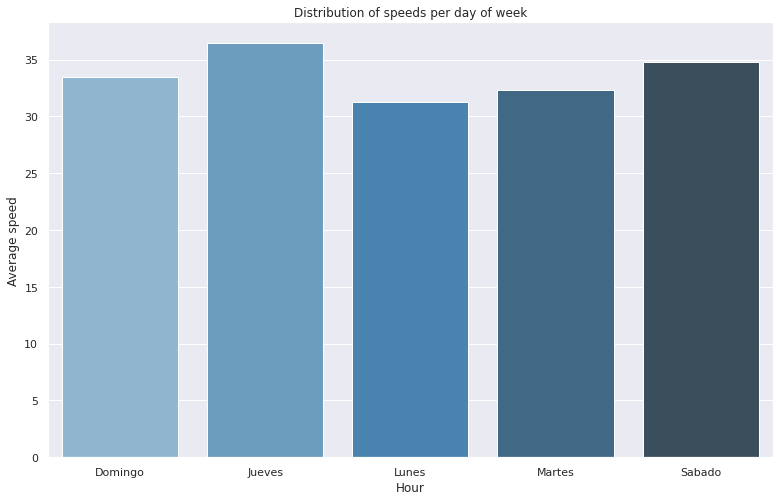

In [18]:
speeds_per_day_of_week = speeds.groupby("DIA_SEMANA")["VEL_PROMEDIO"].mean().to_frame().reset_index()

plt.figure(figsize=(13,8))
sns.barplot(x="DIA_SEMANA", y="VEL_PROMEDIO", data=speeds_per_day_of_week, palette="Blues_d")
plt.title('Distribution of speeds per day of week')
plt.xlabel('Hour')
plt.ylabel('Average speed')
plt.show()

The average speed does not seem to be affected by the day of the week.

## Speeds per location

In [19]:
speeds.groupby("NAME_FROM")["VEL_PROMEDIO"].mean().sort_values(ascending=False).to_frame().head(5)

,VEL_PROMEDIO
NAME_FROM,
"AV.AMERICAS,KR50",71.698369
CL26,56.428882
AV.CL59SUR,49.988409
AUTONORTE,49.974148
AV.CIRCUNVALAR,48.672416


In [20]:
speeds.groupby("NAME_FROM")["VEL_PROMEDIO"].mean().sort_values().to_frame().head(5)

,VEL_PROMEDIO
NAME_FROM,
CL39,10.208952
CL66A,13.265510
CL57,13.480464
"CL19,KR3",14.255335
CL22,14.768908
